# Logistic Regression Project

### GOAL: Create a Classification Model that can predict wheather or nota person has presence of heart disease based on physical features of that person (age, sex, cholestrol, etc...)

#### Complete the TASKs written in bold below.

### Imports

#### TASK: Run the cells below to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### DATA

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df['target'].unique()

array([0, 1], dtype=int64)

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

#### TASK: Explore if the dataset has any missing data and create a statistical summary of the numerical featurees as shown below.

In [5]:
# CODE HERE

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# If every feature have the 0 value that means there is no null values i.e no missing values in the data set

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Visualization Tasks

#### TASK: Create a bar plot that shows the total counts per target value.

In [11]:
# CODE HERE

<AxesSubplot:xlabel='target', ylabel='count'>

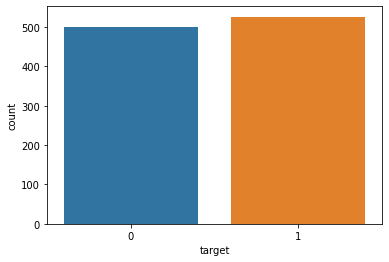

In [14]:
sns.countplot(x='target',data=df)

#### TASK: Create a pairplot that desplays the relationship between the following columns:
         
          ['age','trestbps','chol','thalach','target']
          
_Note: Running a pairplot on everything can take a very long time due to the number of features_         

### Pair Plot

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

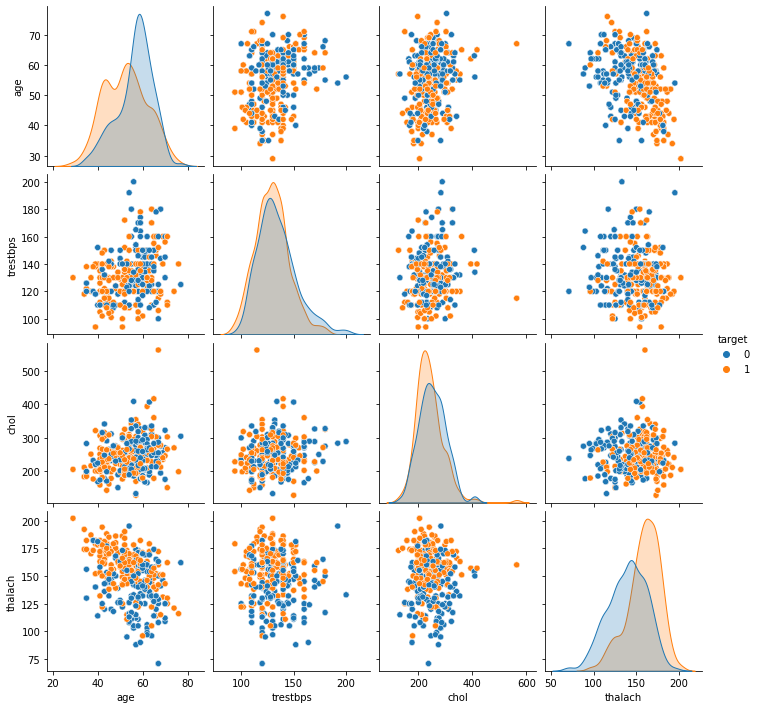

In [18]:
sns.pairplot(df[['age','trestbps','chol','thalach','target']],hue='target')

#### TASK: Create a heatmap that displays the correlation between all the columns.

### Heatmap

In [19]:
# CODE HERE

<AxesSubplot:>

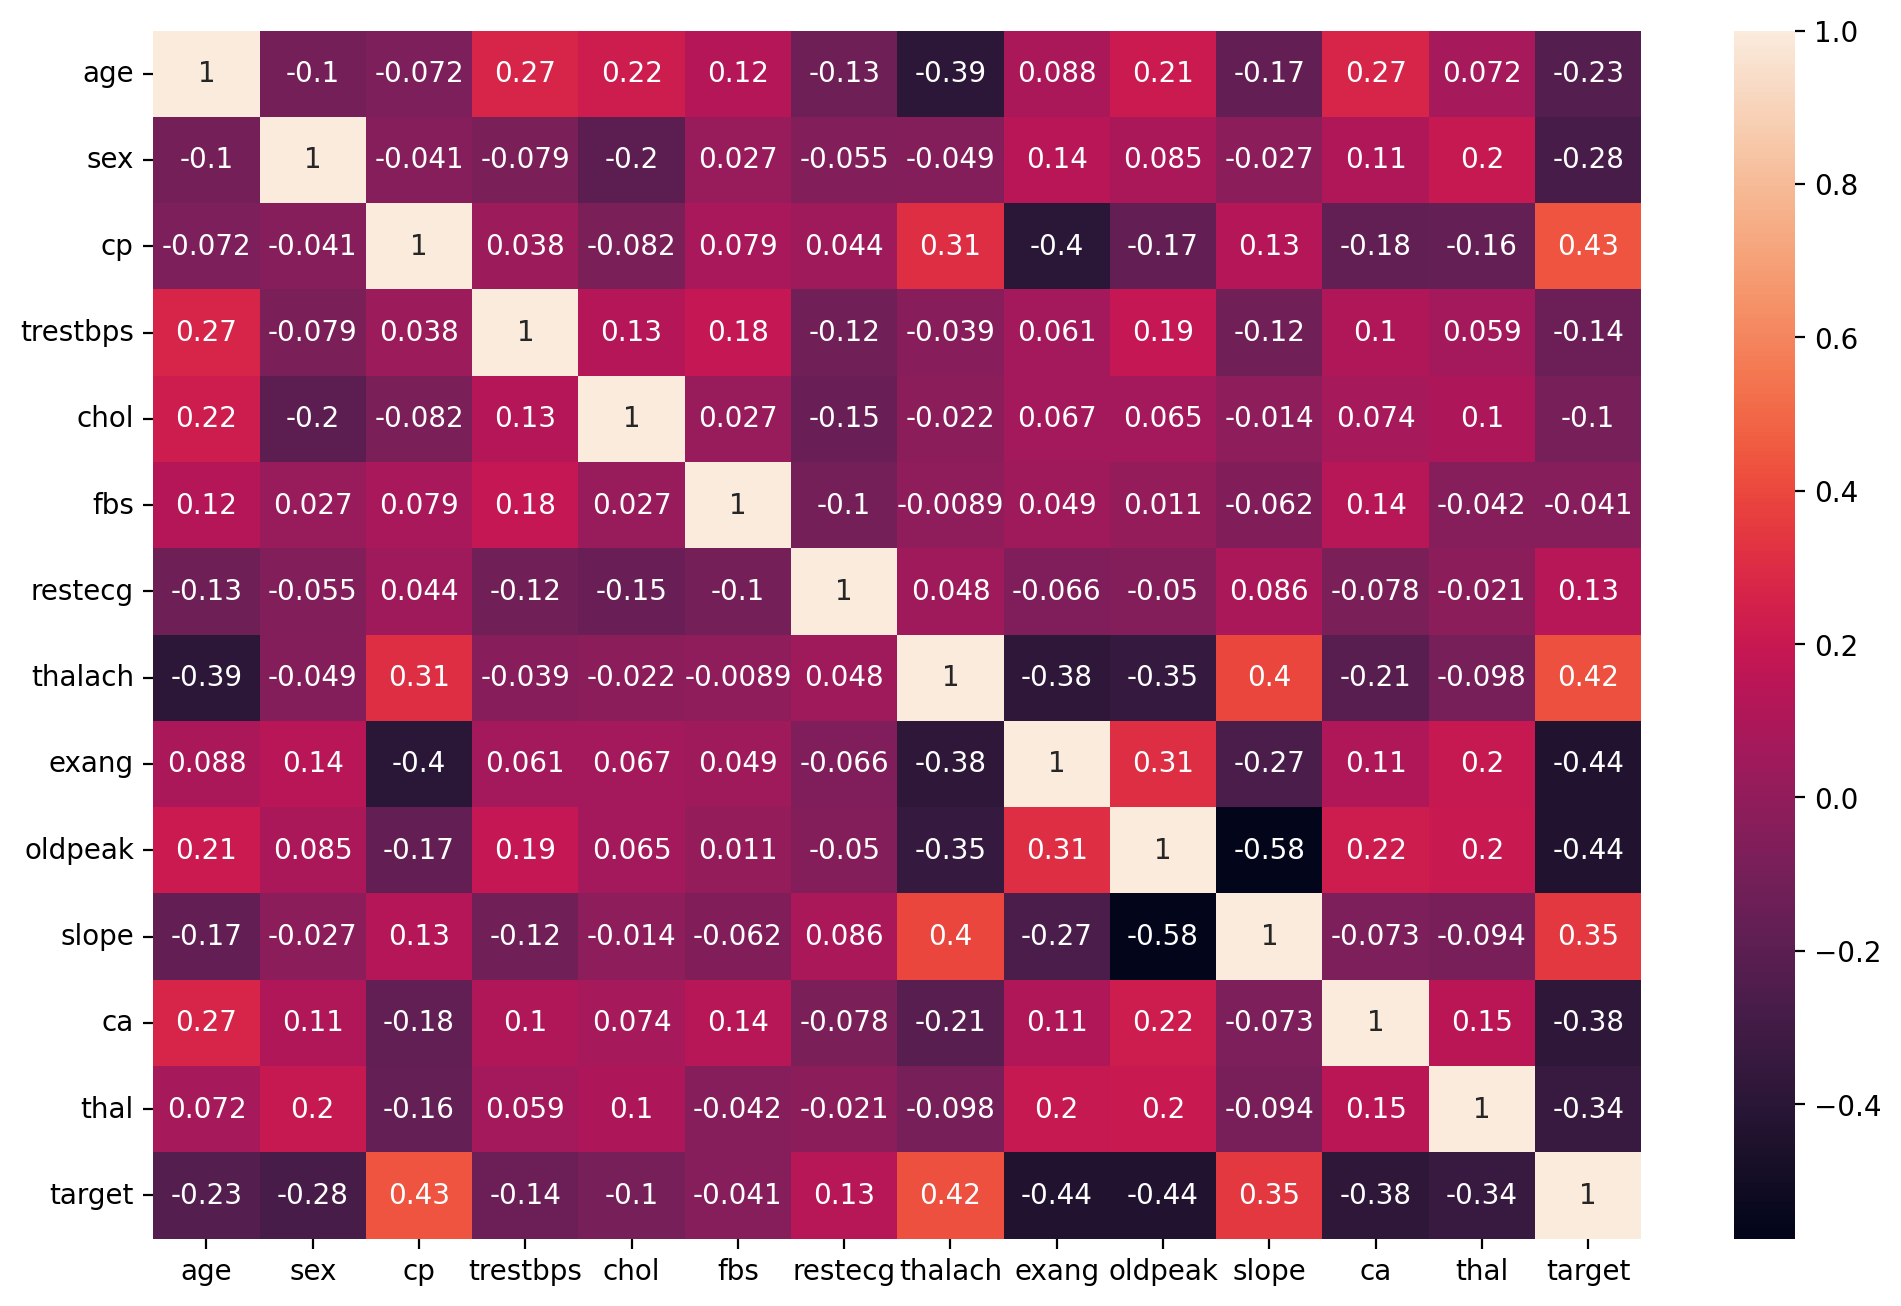

In [26]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),annot=True)

# Machine Learning


## Train | Test Split and Scaling

#### TASK: Saperate the features from the labels into 2 objects, X and y.

In [30]:
# CODE HERE

In [31]:
X = df.drop('target',axis=1)

In [32]:
y = df['target']

#### TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101

In [33]:
# CODE HERE

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).

In [40]:
# CoODE HERE

In [41]:
scaler = StandardScaler()

In [42]:
scaled_X_train = scaler.fit_transform(X_train)

In [44]:
scaled_X_test = scaler.transform(X_test)

# Logistic Regression 

#### TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use _Logistic Regression CV_ OR use a combination of _Logistic Regression_ and _GridSearchCV_.  The choice is up to you.

In [45]:
# CODE HERE

In [47]:
from sklearn.linear_model import LogisticRegressionCV

In [49]:
#help(LogisticRegressionCV)

In [50]:
log_model = LogisticRegressionCV() 

In [52]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

#### TASK: Report back your search's optimal parameters, specifically the C value.

_Note: You may get a different value than what is shown here depending on how you conducted your search_

In [53]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [54]:
log_model.C_

array([0.00599484])

In [55]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

## Coeffecients

#### TASK: Report back the model's coeffecients.

In [61]:
log_model.coef_[0]

array([-0.1093356 , -0.29001856,  0.36265298, -0.10367586, -0.06603391,
       -0.01985913,  0.09946636,  0.25597633, -0.28538996, -0.29238371,
        0.20479911, -0.32049603, -0.25727105])

#### BONUS TASK: We didn't show this in the lecture notebooks, but you have the skills to do this! Create a visualization of the coefficients by using a barplot of their values. Even more bonus points if you can figure out how to sort the plot! If you get stuck on this, feel free to quickly view the solutions notebook for hints, there are many ways to do this, the solutions use a combination of pandas and seaborn.

In [58]:
# CODE HERE

In [62]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [63]:
coefs

age        -0.109336
sex        -0.290019
cp          0.362653
trestbps   -0.103676
chol       -0.066034
fbs        -0.019859
restecg     0.099466
thalach     0.255976
exang      -0.285390
oldpeak    -0.292384
slope       0.204799
ca         -0.320496
thal       -0.257271
dtype: float64

<AxesSubplot:>

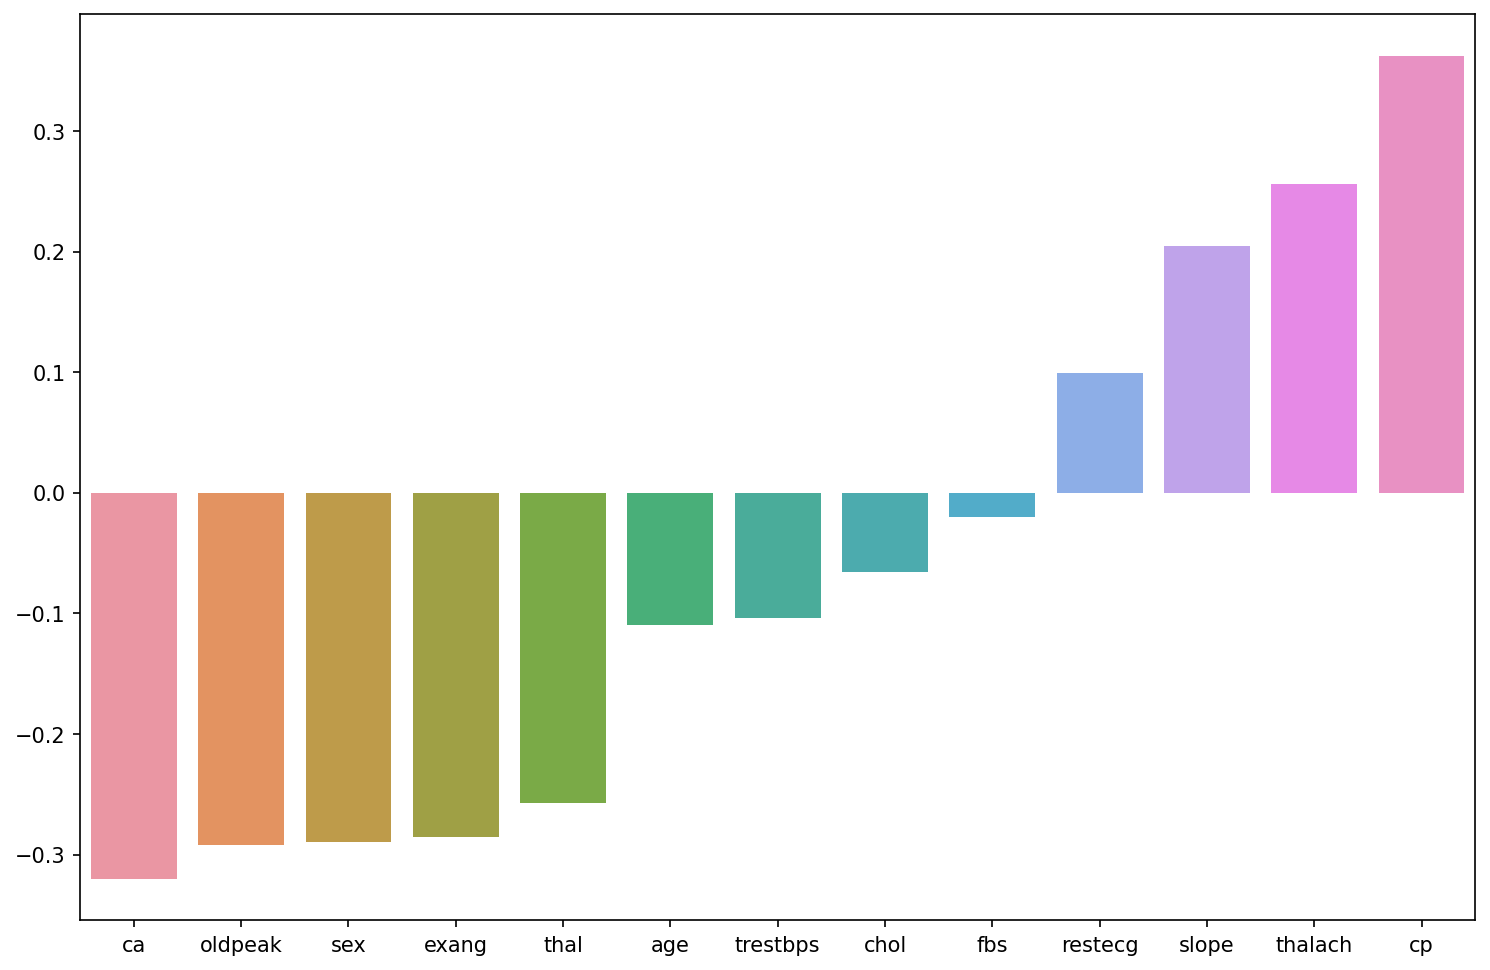

In [66]:
coefs = coefs.sort_values()
plt.figure(figsize=(12,8),dpi=150)
sns.barplot(x=coefs.index,y=coefs)

# Model Performance Evaluation

#### TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.

#### TASK: Create the following evaluations:

    - Confusion Matrix Array
    - Confusion Matrx Plot
    - Classification Report

In [67]:
# CODE HERE

In [68]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [69]:
y_pred = log_model.predict(scaled_X_test)

In [70]:
confusion_matrix(y_test,y_pred)

array([[41,  9],
       [ 5, 48]], dtype=int64)

### Confusion Matrix

In [71]:
# CODE HERE

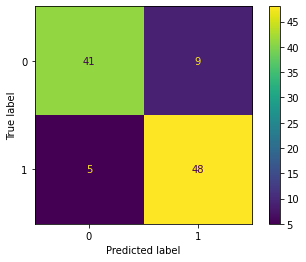

In [73]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

### Classification Report

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.84      0.91      0.87        53

    accuracy                           0.86       103
   macro avg       0.87      0.86      0.86       103
weighted avg       0.87      0.86      0.86       103



### Performance Curves

#### TASK: Create both the precision recall curve and the ROC curve.

In [75]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

### precision recall curve.

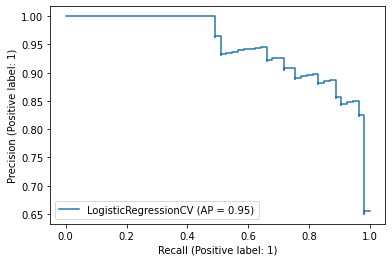

In [76]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

###  ROC Curve.

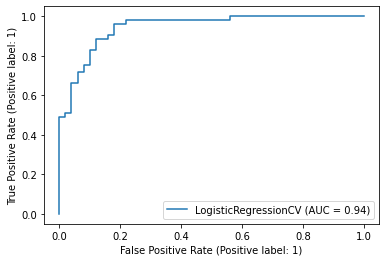

In [77]:
plot_roc_curve(log_model,scaled_X_test,y_test)

#### Final Task: A patient with the following features has into the medical office:

            age          48.0
            sex           0.0
            cp            2.0
            trestbps    130.0
            chol        275.0
            fbs           0.0
            restecg       1.0
            thalach     139.0
            exang         0.0
            oldpeak       0.2
            slope         2.0
            ca            0.0
            thal          2.0
            

#### TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?

_For convience, we created an array of the features for the patient above_

In [78]:
patient = [[54. , 1. , 0. , 122. , 286. , 0. , 0. , 116. , 1. , 3.2 , 1. , 2. , 2. ]]

In [79]:
log_model.predict(patient)

array([0], dtype=int64)

In [80]:
log_model.predict_proba(patient)

array([[9.99962215e-01, 3.77854601e-05]])

In [82]:
# Here there is a 99.9% of probability that the patient belongs to class 0. And the small 37% of probability of the patient belongs to the class 1.

##                       THE END 


# Great Job!